In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [87]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [88]:
df.shape

(51717, 17)

In [89]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Deleting redundant columns**

In this using (drop) we selected the columns to be deleted and then by using (inplace=True) we made changes in original DataFrame.

In [91]:
df.drop(columns=['url','address','phone','reviews_list','dish_liked'],inplace=True)
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari


**Renaming the columns******

In [92]:
df.rename(columns={'name':'Restaurants','book_table':'Booking_Table','rate':'Ratings','votes':'Votes','approx_cost(for two people)':'Cost',
                  'menu_item':'Menu','listed_in(type)':'Type','listed_in(city)':'City','rest_type':'Resto_type','location':'Location'},inplace=True )

In [93]:
df.head(1)

,Restaurants,online_order,Booking_Table,Ratings,Votes,Location,Resto_type,cuisines,Cost,Menu,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari


**Checking for null values in columns**

In [94]:
df.isnull().sum()

Restaurants         0
online_order        0
Booking_Table       0
Ratings          7775
Votes               0
Location           21
Resto_type        227
cuisines           45
Cost              346
Menu                0
Type                0
City                0
dtype: int64

In [95]:
df.isnull().sum().sum()

8414

**Droping NaN values from dataframe**

For Droping (Missing) values we're going to use dropna() function, which will remove all nan values from rows and columns from DataFrame.

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

Restaurants      0
online_order     0
Booking_Table    0
Ratings          0
Votes            0
Location         0
Resto_type       0
cuisines         0
Cost             0
Menu             0
Type             0
City             0
dtype: int64

**Deleting duplicate rows**

In [98]:
len(df)

43533

Duplicate value before removing : 43533

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
len(df)

43464

After removing all duplicates from rows the value is : 43464

**Cleaning the individual columns**

In [101]:
for i in df['Restaurants'].head(20):
    
    print(i)

Jalsa
Spice Elephant
San Churro Cafe
Addhuri Udupi Bhojana
Grand Village
Timepass Dinner
Rosewood International Hotel - Bar & Restaurant
Onesta
Penthouse Cafe
Smacznego
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley
Cafe Shuffle
The Coffee Shack
Caf-Eleven
San Churro Cafe
Cafe Vivacity
Catch-up-ino
Kirthi's Biryani
T3H Cafe
360 Atoms Restaurant And Cafe


CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley these special char. need to be removed using regex.

In [102]:
df['Restaurants'] = df['Restaurants'].str.replace(r'[Ã|Â][^\d]','')



/tmp/ipykernel_32/235824431.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Restaurants'] = df['Restaurants'].str.replace(r'[Ã|Â][^\d]','')


In [103]:
for i in df['Restaurants'].head(20):
    print(i)

Jalsa
Spice Elephant
San Churro Cafe
Addhuri Udupi Bhojana
Grand Village
Timepass Dinner
Rosewood International Hotel - Bar & Restaurant
Onesta
Penthouse Cafe
Smacznego
Caf Down The Alley
Cafe Shuffle
The Coffee Shack
Caf-Eleven
San Churro Cafe
Cafe Vivacity
Catch-up-ino
Kirthi's Biryani
T3H Cafe
360 Atoms Restaurant And Cafe


**Cleaning Column online_order**

In [104]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

**Cleaning Column pre_booking**

In [105]:
df['Booking_Table'].unique()

array(['Yes', 'No'], dtype=object)

Cleaning Column Ratings

In [106]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**We have to remove some special symbols and char. like '/5','NEW','-' using regex...**

In [107]:
df['Ratings'] = df['Ratings'].str.replace(r' /5|/5|NEW|-','0')

/tmp/ipykernel_32/1544321340.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ratings'] = df['Ratings'].str.replace(r' /5|/5|NEW|-','0')


**Result after removings all special symbols and char..**

In [108]:
df['Ratings'].unique()

array(['4.10', '3.80', '3.70', '3.60', '4.60', '4.00', '4.20', '3.90',
       '3.10', '3.00', '3.20', '3.30', '2.80', '4.40', '4.30', '0',
       '2.90', '3.50', '2.60', '3.40', '4.50', '2.50', '2.70', '4.70',
       '2.40', '2.20', '2.30', '4.80', '4.90', '2.10', '2.00', '1.80'],
      dtype=object)

In [109]:
df['Ratings'] = df['Ratings'].astype('float')
df['Ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

**Cleaning Column Votes**

In [110]:
df['Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

**Cleaning column Location**

In [111]:
df['Location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

**Cleaning column Resto_type**

In [112]:
df['Resto_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

**Data Visualization**
1.Restaurants delivering Online or not
2.Restaurants allowing table booking or not
3.Table booking Rate vs Rate
4.Best Location
5.Relation between Location and Rating
6.Restaurant Type
7.Gaussian Rest type and Rating
8.Types of Services
9.Relation between Type and Rating
10.Cost of Restaurant
11.No. of restaurants in a Location
12.Restaurant type
13.Most famous restaurant chains in Bengaluru

**Restaurants delivering Online or not**

In [113]:
df.head(10)

,Restaurants,online_order,Booking_Table,Ratings,Votes,Location,Resto_type,cuisines,Cost,Menu,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,[],Cafes,Banashankari


Text(0.5, 1.0, 'Online-Delivery')

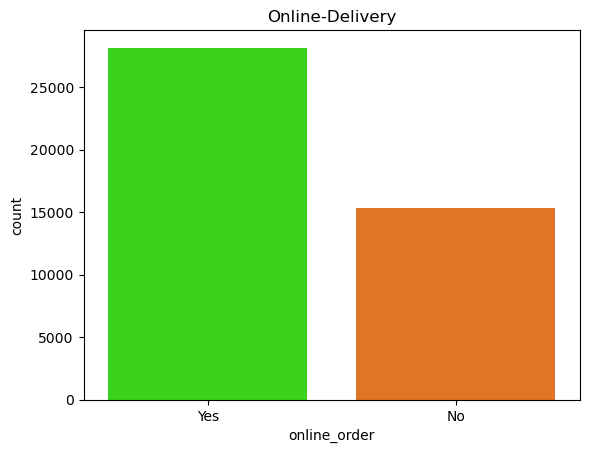

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(x='online_order', data=df,palette='gist_ncar')
plt.title('Online-Delivery')


**Restaurants allowing table booking or not**

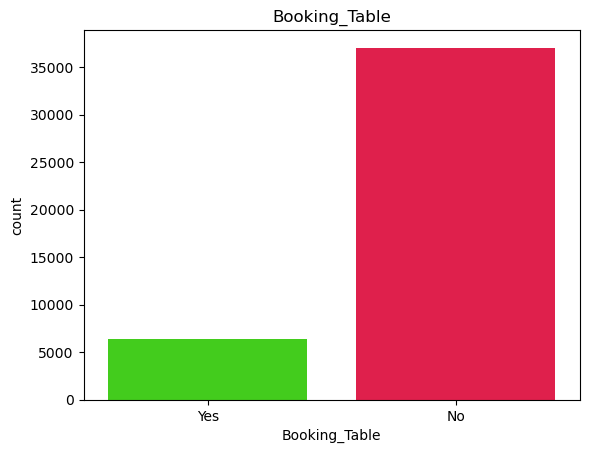

In [115]:
sns.countplot(x='Booking_Table',data=df,palette='prism')
plt.title('Booking_Table')
plt.show()

**Booking_Table vs Ratings**

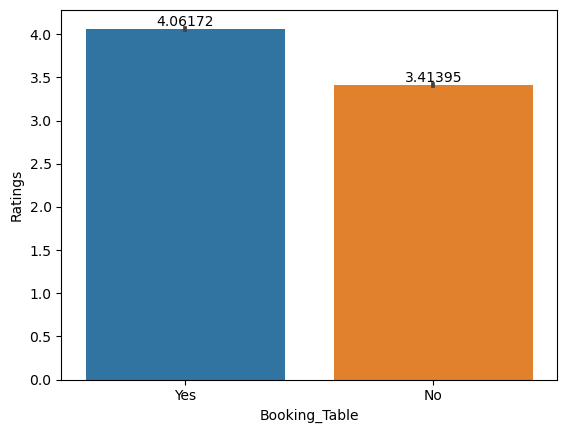

In [116]:
df1 = sns.barplot(x='Booking_Table',y='Ratings',data=df)
for i in df1.containers:
    df1.bar_label(i)
plt.show()

**PLOT FOR BEST LOCATION**

,Ratings
Location,
BTM,13832.6
Koramangala 5th Block,9195.4
HSR,7327.0
Indiranagar,6877.6
JP Nagar,6288.6


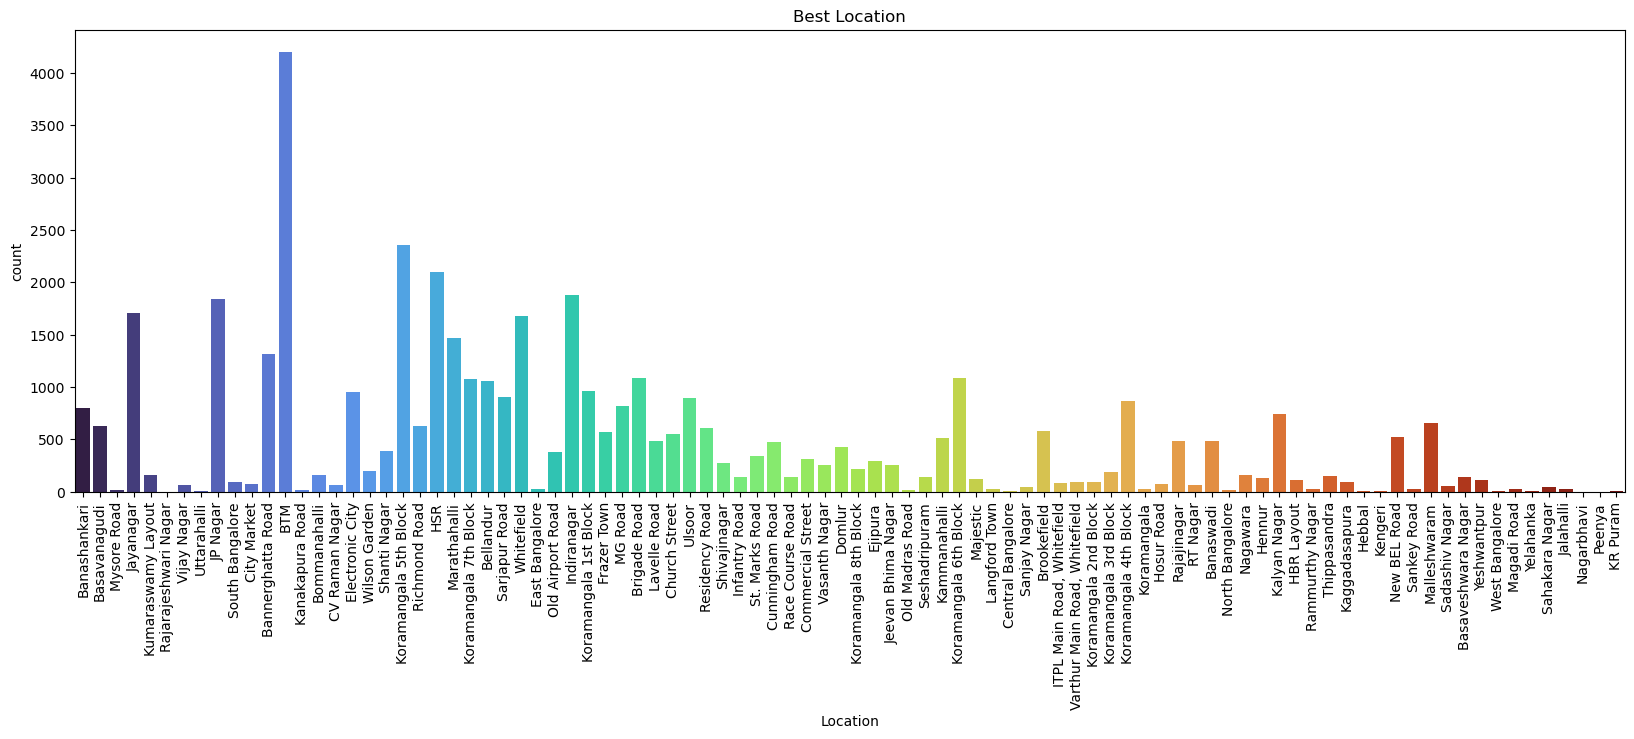

In [117]:
best_ratings = df.loc[:,['Location','Ratings']]
best_ratings = df.groupby('Location')['Ratings'].sum()
best_ratings = best_ratings.to_frame()
best_ratings = best_ratings.sort_values("Ratings",ascending=False)
display(best_ratings.head())
plt.figure(figsize=(20,6))
a = sns.countplot(data=df,x='Location',palette='turbo')
plt.title('Best Location')
plt.xticks(rotation=90)
plt.show()

As we can see "BTM" has the best Location.

<Figure size 640x480 with 0 Axes>

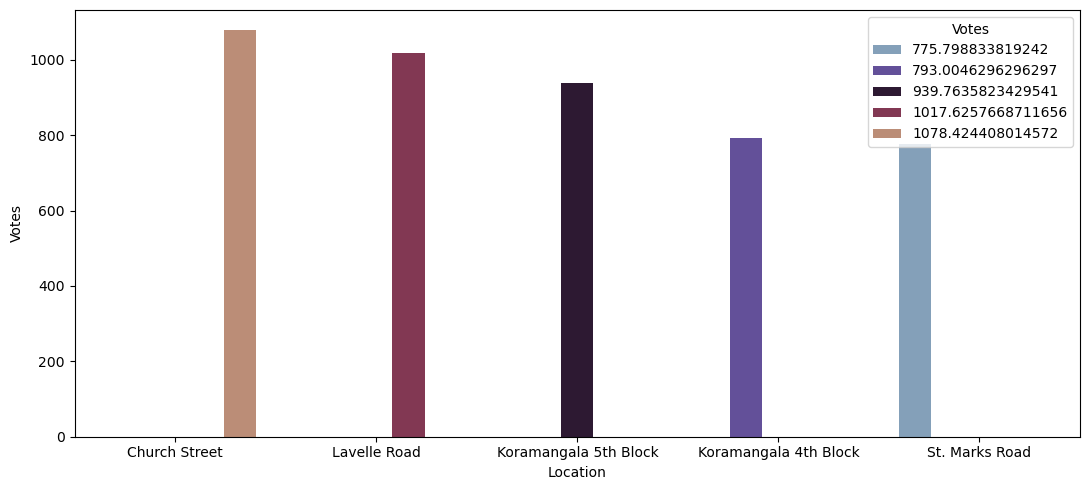

In [118]:
fig=plt.figure()
fig, axes=plt.subplots(nrows=1, ncols=1,figsize=(11,5))

a= df.groupby('Location')['Votes'].mean().nlargest(5).reset_index()

sns.barplot(x='Location',y='Votes',data=a,hue='Votes',palette='twilight')
fig.tight_layout()

**Relation between Location and Rating**

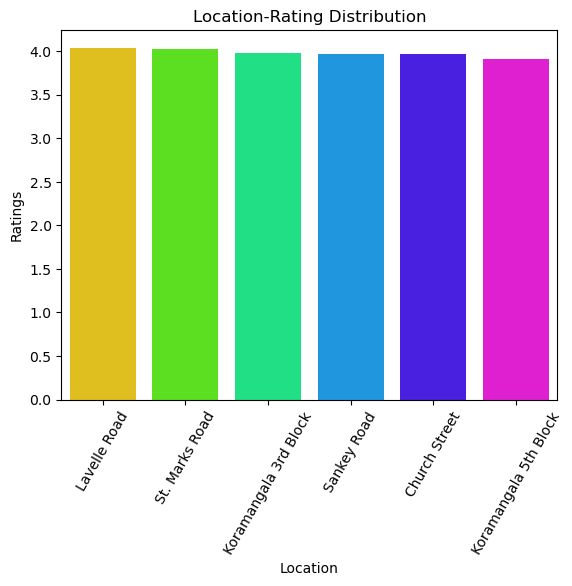

In [119]:

a =df.groupby('Location')['Ratings'].mean().nlargest(6).reset_index()

sns.barplot(x='Location',y='Ratings',data=a,palette='hsv')
plt.title('Location-Rating Distribution')
plt.xticks(rotation=60)

plt.show()

**Gaussian Rest type and Rating**

<Axes: xlabel='Ratings', ylabel='Density'>

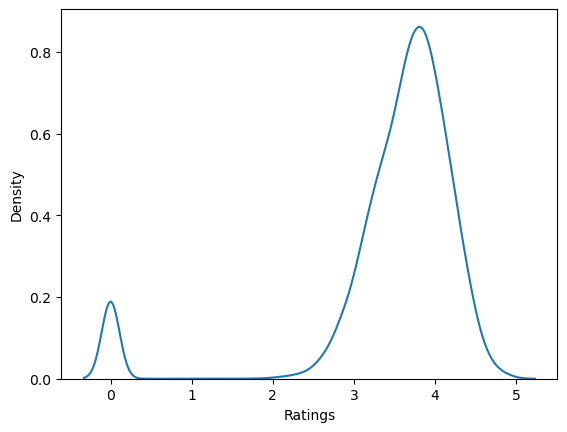

In [120]:
sns.kdeplot(data = df, x = 'Ratings')

**Restaurant Type**

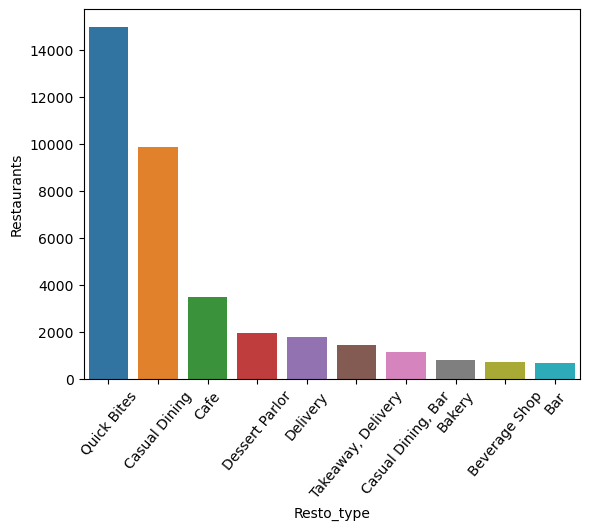

In [121]:
a = df.groupby('Resto_type')[['Restaurants']].count().nlargest(10,['Restaurants']).reset_index()
sns.barplot(x='Resto_type',y='Restaurants',data=a)
plt.xticks(rotation=50)
plt.show()

**Type of Service**

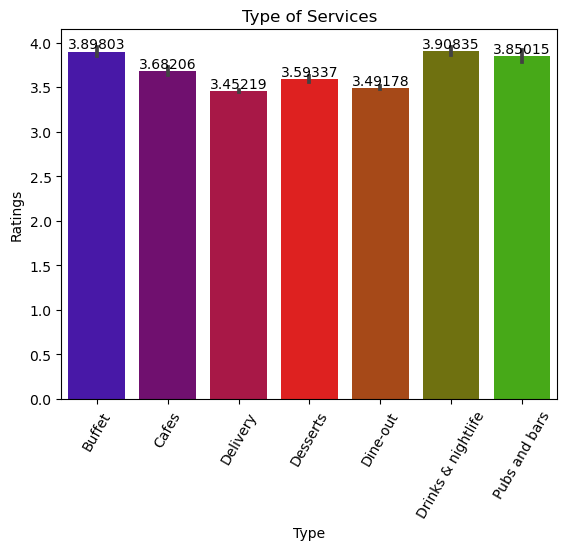

In [122]:
a = sns.barplot(x='Type',y='Ratings',data=df,palette='brg')
for i in a.containers:
    a.bar_label(i)
plt.xticks(rotation=60)
plt.title('Type of Services')
plt.show()

**Relation between Type and Rating **

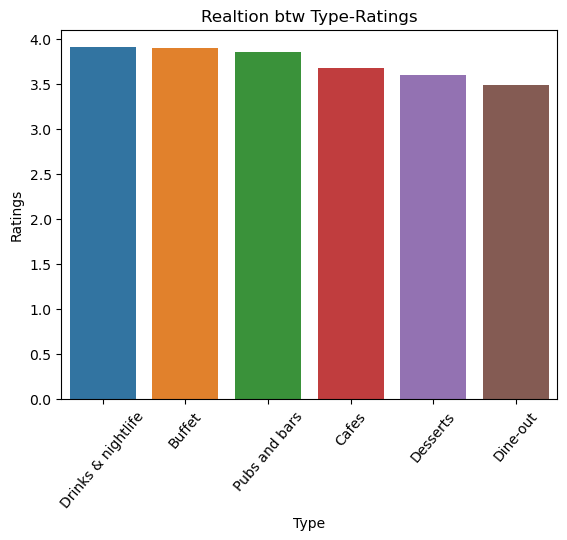

In [123]:

a = df.groupby('Type')['Ratings'].mean().nlargest(6).reset_index()
sns.barplot(x='Type',y='Ratings',data=a)
plt.title('Realtion btw Type-Ratings')
plt.xticks(rotation=50)
plt.show()

**No. of restaurants in a Location**

In [125]:
df[['Restaurants','Cost']].dtypes

Restaurants    object
Cost           object
dtype: object

In [126]:
df['Cost'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [127]:
df['Cost'] = df['Cost'].str.replace(",","")



In [128]:
df['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [ ]:
df['Cost']=df['Cost'].astype(float)

**Cost of Restaurant**

,Cost
Restaurants,
Ayda Persian Kitchen,950950950950950950950950950950950950950950950950
Bathinda Dine,950950950950950950950950950950
Engine,950950950950950950950950950
The Onyx - The HHI Select Bengaluru,950950950950950950950950
Pindi Bangalore,950950


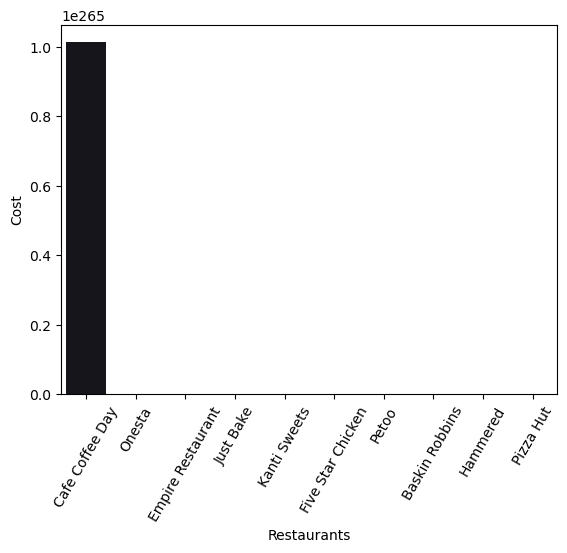

In [135]:
best_cost = df.loc[:,['Restaurants','Cost']]
best_cost = df.groupby('Restaurants')['Cost'].sum()
best_cost = best_cost.to_frame()
best_cost = best_cost.sort_values("Cost",ascending=False)
display(best_cost.head())

a = df.groupby('Restaurants')[['Cost']].mean().nlargest(10,['Cost']).reset_index()
sns.barplot(x='Restaurants',y='Cost',data=a,palette='bone')
plt.xticks(rotation=60)
plt.show()

In [132]:
famous_resto = df.groupby('Restaurants')['Votes'].agg('mean').sort_values(ascending=False).head(10)

,Votes
Restaurants,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7860.900000
Church Street Social,7561.727273
Hoot,7257.000000
The Hole in the Wall Cafe,7124.875000


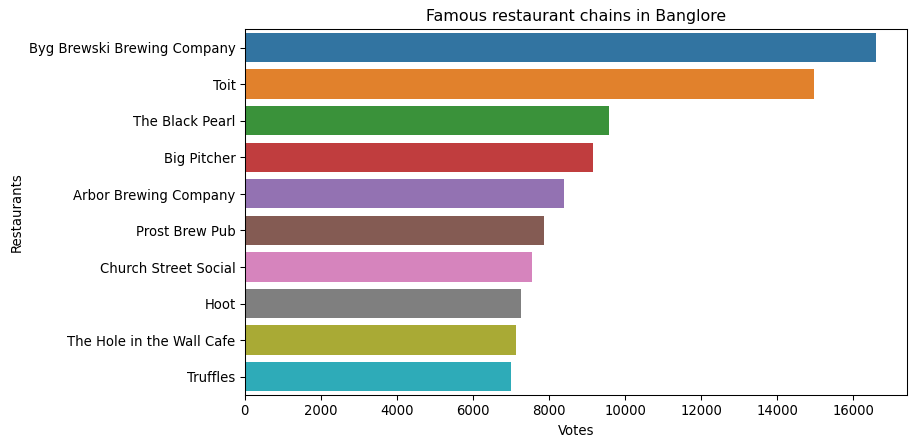

In [133]:
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=famous_resto.index,x=famous_resto,orient='h')
display(famous_resto.to_frame())
plt.title('Famous restaurant chains in Banglore')
plt.show()